## Reconhecimento Facial com Machine Learning Usando SVM e PCA

# Criação de um modelo de reconhecimento facial bidimensional utilizando o algoritmo SVM e PCA para redução de dimensionalidade

## Importação dos Pacotes

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import svm

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

## Carregando o Dataset

In [3]:
## Utilização do Dataset Labeled faces in thee Wild Home.

In [4]:
dataset_faces = datasets.fetch_lfw_people(min_faces_per_person = 70,resize = 0.4)

In [5]:
dataset_faces.data.shape

(1288, 1850)

In [6]:
# Verificando as imagens 
dataset_faces.data

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

## Preparando o Dataset

In [7]:
# extraindo o shape (formato) das imagens
num_amostras , altura, largura = dataset_faces.images.shape

In [8]:
#Quantidade de Imagens no DataSet
num_amostras

1288

In [9]:
# Altura(nº pixels) em cada imagem
altura

50

In [10]:
# Largura (nº pixels) em cada imagem
largura

37

In [11]:
# variável de entrada
x = dataset_faces.data

In [12]:
# Nº de atributos em x( quantidade de pixels no dataset de treino)
num_atributos = x.shape[1]
num_atributos

1850

In [13]:
# colocando target em y
y = dataset_faces.target

In [14]:
#extração dos nomes das classes
target_names = dataset_faces.target_names

In [15]:
# Nº de classes (n° de pessoas que o modelo pode classificar)
num_classes = target_names.shape[0]
num_classes

7

In [16]:
print(y)

[5 6 3 ... 5 3 5]


In [17]:
# Resumos dos dados
print("\nTamanho Total do Dataset:\n")
print("Número de Amostras: %d" % num_amostras)
print("Número de Atributos: %d" % num_atributos)
print("Número de Classes: %d" % num_classes)


Tamanho Total do Dataset:

Número de Amostras: 1288
Número de Atributos: 1850
Número de Classes: 7


## Visualizando os Dados

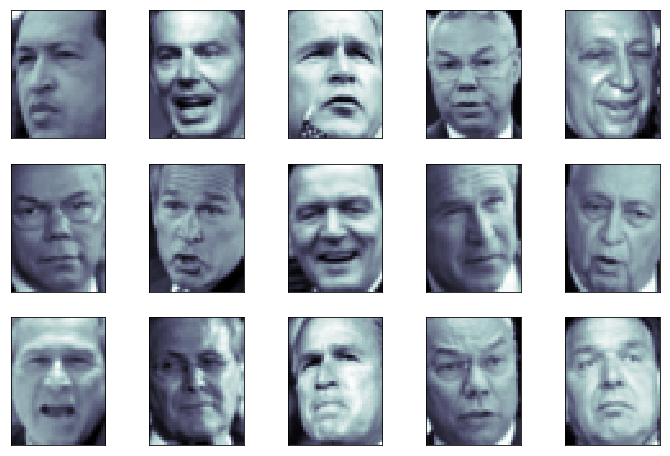

In [19]:
fig = plt.figure(figsize = (12,8))

for i in range(15):
    
    ax = fig.add_subplot(3,5,i+1,xticks = [],yticks=[])
    
    ax.imshow(dataset_faces.images[i],cmap= plt.cm.bone)

## Visualizando a Distribuição do Dataset

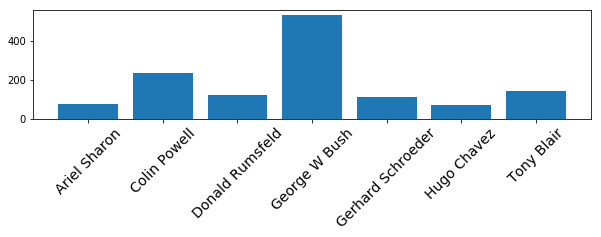

In [21]:
plt.figure(figsize = (10,2))

unique_targets = np.unique(dataset_faces.target)

counts = [(dataset_faces.target == i ).sum() for i in unique_targets]

plt.xticks(unique_targets, dataset_faces.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45, size = 14)
_ = plt.bar(unique_targets, counts)

In [22]:
# Divisão de Dados em treino e teste
x_treino ,x_teste , y_treino ,y_teste = train_test_split(dataset_faces.data, dataset_faces.target,random_state=0)

In [23]:
print(x_treino.shape,x_teste.shape)

(966, 1850) (322, 1850)


## Pré-Processamento: PCA

In [25]:
pca = decomposition.PCA (n_components = 150,
                        whiten = True,
                        random_state = 199,
                        svd_solver = 'randomized')

In [26]:
pca.fit(x_treino)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=199,
  svd_solver='randomized', tol=0.0, whiten=True)

In [27]:
x_treino_pca = pca.transform(x_treino)
x_teste_pca = pca.transform(x_teste)

## Construção do Modelo de Machine Learning com SVM


In [30]:
#criação do modelo
modelo_svm = svm.SVC(C = 5.,gamma = 0.001)

In [31]:
#treinamento do modelo
modelo_svm.fit(x_treino_pca, y_treino)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação do Modelo

In [32]:
print(x_teste.shape)

(322, 1850)


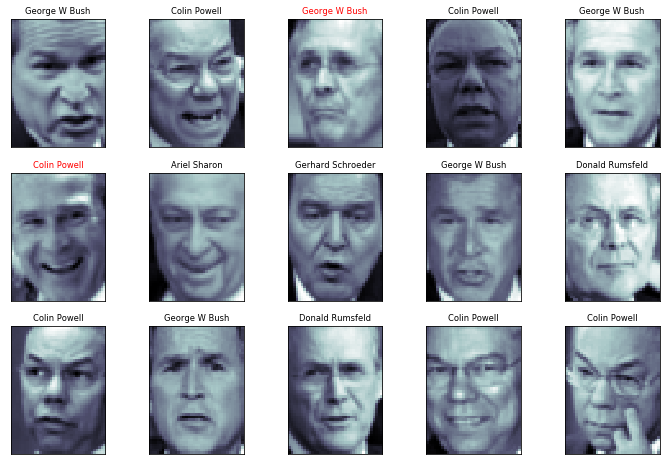

In [34]:
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12, 8))

# Loop por 15 imagens
for i in range(15):
    
    # Subplots
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # Mostra a imagem real no dataset de teste
    ax.imshow(x_teste[i].reshape((50, 37)), cmap = plt.cm.bone)
    
    # Faz a previsão de classe com o modelo treinado
    y_pred = modelo_svm.predict(x_teste_pca[i].reshape(1,-1))[0]
    
    # Se a previsão de classe for igual a classe real, colocamos o nome em preto, se não em vermelho
    # Nome em vermelho significa erro do modelo
    color = 'black' if y_pred == y_teste[i] else 'red'
    
    # Define o título
    ax.set_title(dataset_faces.target_names[y_pred], fontsize = 'small', color = color)

In [35]:
#score do modelo
print(modelo_svm.score(x_teste_pca,y_teste))

0.8540372670807453


 O modelo tem eficiência de 85.4%